### Time Series & Category Charts

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


### Raw Data Load

In [2]:
df=pd.read_csv('Sales_Raw_Data_clean.csv')

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.shape

(51290, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [6]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [7]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst=True)

In [9]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date                 object
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                     object
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [10]:
df.set_index('order_date', inplace=True)
df.sort_index(inplace=True)
#first we change index as order_date
#second we sort index

In [11]:
df['sales']=df['sales'].str.replace(',','').str.replace(' ','')
df['sales']=pd.to_numeric(df['sales'])

### Daily sales Plot

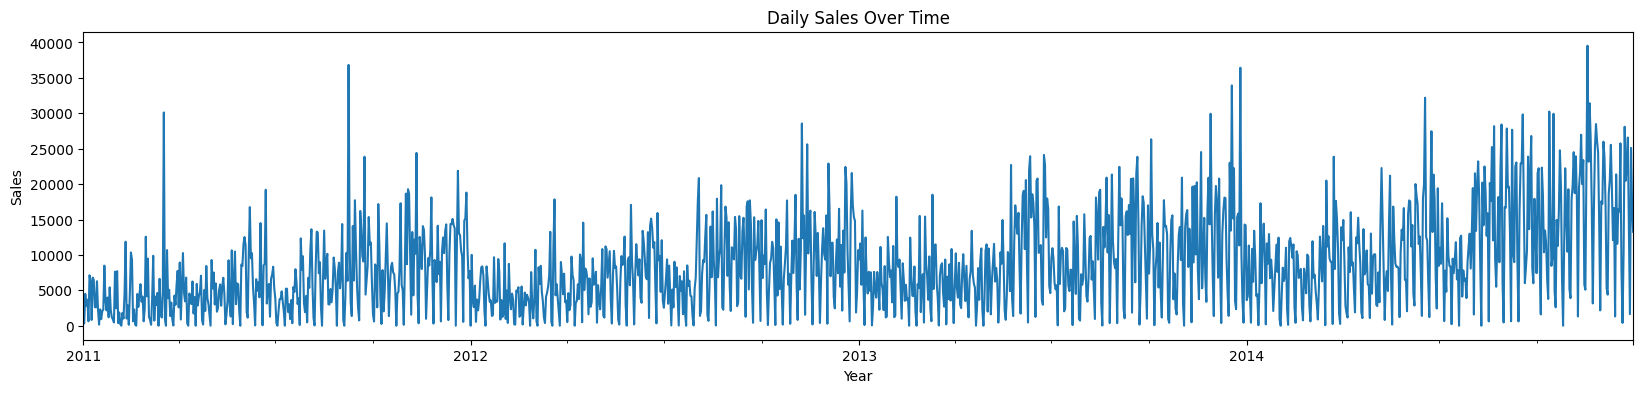

In [12]:
Daily_sales = df['sales'].resample('D').sum()

plt.figure(figsize=(20,4))
Daily_sales.plot()
plt.title("Daily Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.savefig("sales_daily.png", dpi=300, bbox_inches='tight')
plt.show()

#### In the Above Daily sales plot, each tick on the X-axis represents one Day, and the corresponding Y-value(Peak) represents the total aggregated sales for that Day.¶

### Monthly Sales Plot 

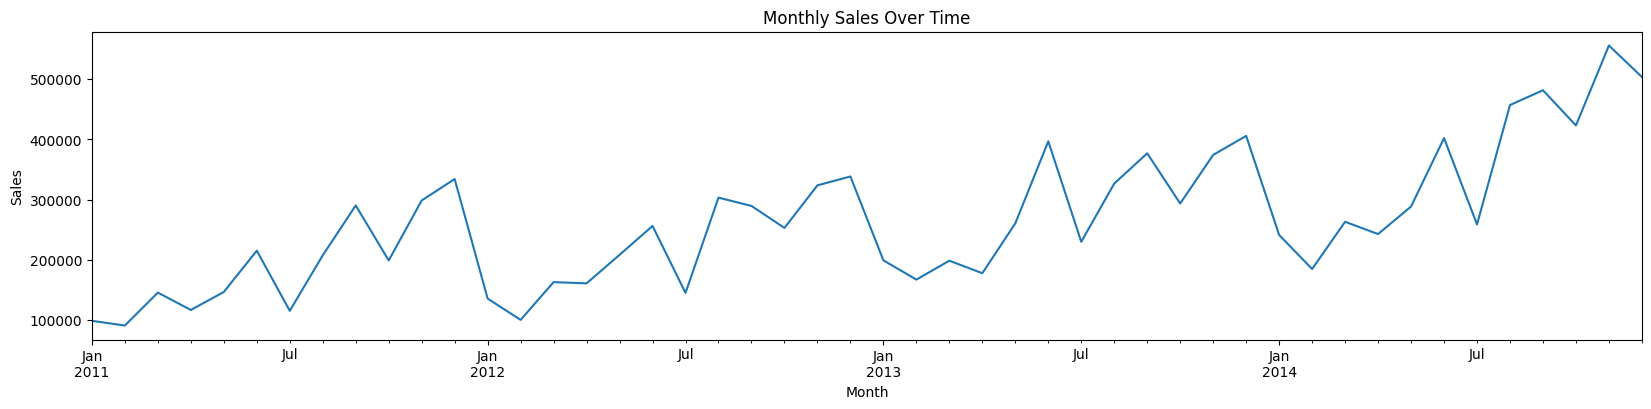

In [13]:
Monthly_sales = df['sales'].resample('ME').sum()

plt.figure(figsize=(20,4))
Monthly_sales.plot()
plt.title("Monthly Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.savefig("sales_monthly.png", dpi=300, bbox_inches='tight')
plt.show()

#### In the Above monthly sales plot, each tick on the X-axis represents one month, and the corresponding Y-value represents the total aggregated sales for that month.

### Quarterly Sales Plot

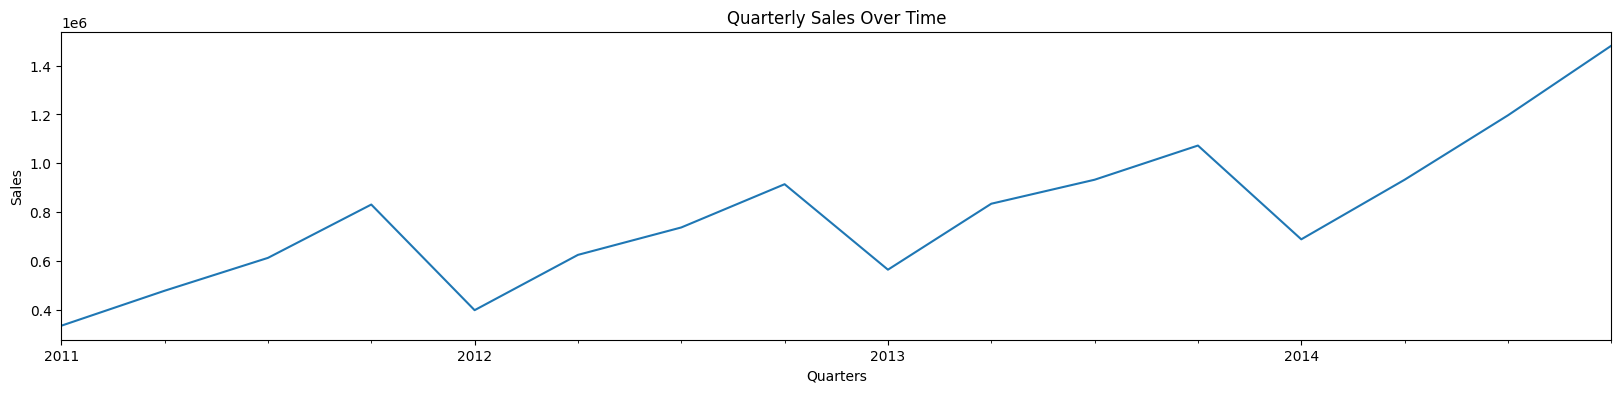

In [14]:
Quarterly_sales = df['sales'].resample('QE').sum()

plt.figure(figsize=(20,4))
Quarterly_sales.plot()
plt.title("Quarterly Sales Over Time")
plt.xlabel("Quarters")
plt.ylabel("Sales")
plt.savefig("sales_quarterly.png", dpi=300, bbox_inches='tight')
plt.show()

#### In the Above Quarterly sales plot, each tick on the X-axis represents one Quarter, and the corresponding Y-value represents the total aggregated sales for that Quarter.

### Yearly sales Plot

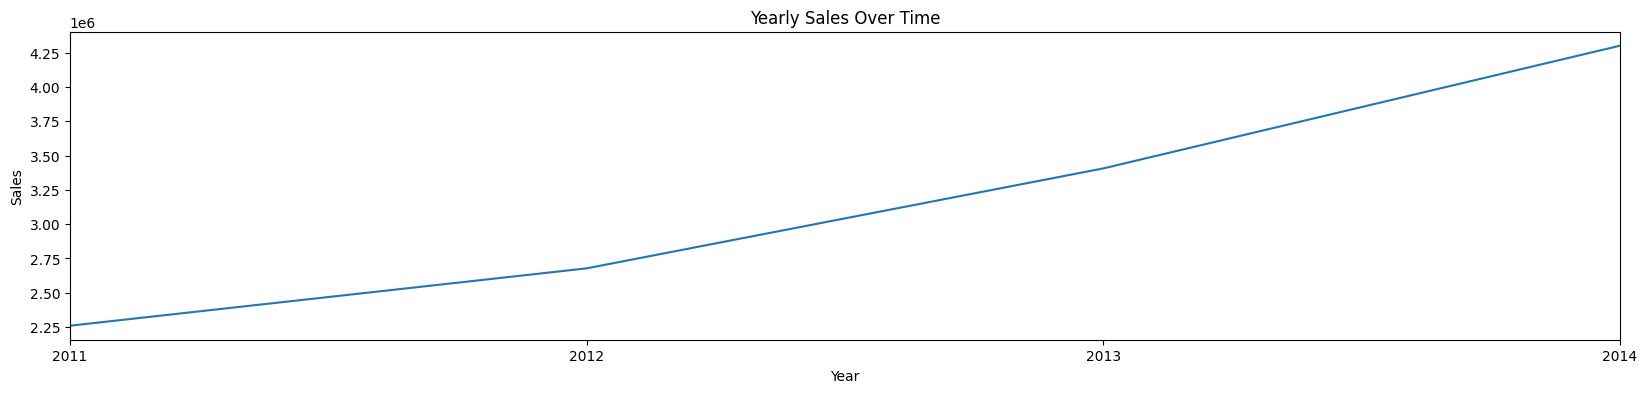

In [15]:
Yearly_sales = df['sales'].resample('YE').sum()

plt.figure(figsize=(20,4))
Yearly_sales.plot()
plt.title("Yearly Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.savefig("sales_yearly.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
category_sales = df.groupby('category')['sales'].sum()

In [17]:
category_sales = df.groupby('category')['sales'].sum()

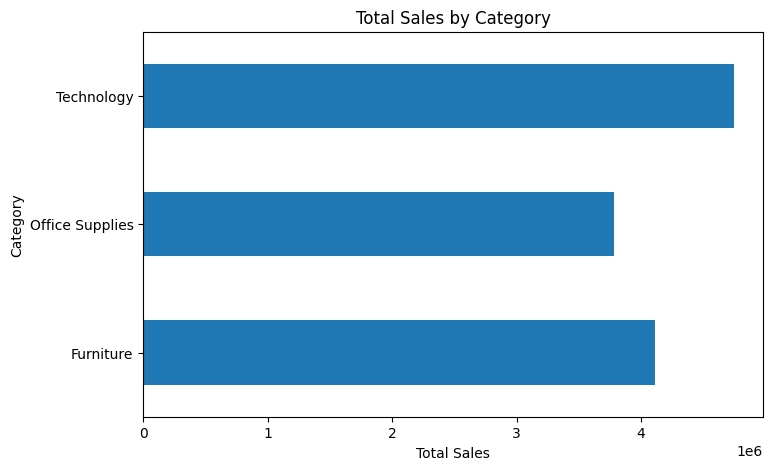

In [18]:
plt.figure(figsize=(8,5))
category_sales.plot(kind='barh')

plt.title("Total Sales by Category")
plt.ylabel("Category")
plt.xlabel("Total Sales")
plt.xticks(rotation=0)
plt.savefig("sales_bar_chart.png", dpi=300, bbox_inches='tight')
plt.show()

#### In the Above Bar chart, Each bar represents a category, Corresponding X-values represents total sales. 

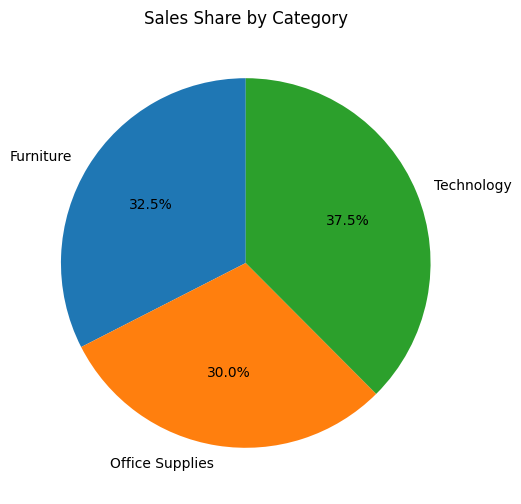

In [19]:


plt.figure(figsize=(6,6))

category_sales.plot(
    kind='pie',
    autopct='%1.1f%%',   # show percentage
    startangle=90        # rotate for better view
)

plt.title("Sales Share by Category")
plt.ylabel('')  # remove default ylabel
plt.savefig("sales_share_pie.png", dpi=300, bbox_inches='tight')
plt.show()

#### In the Above Pie Chart,Technology contributes the highest share to total sales.

## Chart Choice

### Line Chart

#### I used a line chart to visualize sales over time because line charts are best suited for identifying trends, patterns, and fluctuations in time-series data. It clearly shows whether sales are increasing, decreasing, or seasonal over different periods.

### Bar / Column Chart

#### I used a bar (column) chart to compare sales across different categories because bar charts effectively display differences in magnitude between discrete groups. It makes it easy to identify which category has higher or lower sales.

### Pie Chart

#### I used a pie chart to show the proportional contribution of each category to total sales. Pie charts are suitable when the objective is to visualize percentage share of categories in the overall dataset.

### Horizontal Bar Chart

#### I used a horizontal bar chart because it improves readability when category names are long and allows easy comparison between groups.